# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [62]:
import pandas as pd
df = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False, dtype={'prod1' : 'str', 'prod2' : 'str'})
df.head()
%matplotlib inline

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


### Check that your dataframe has 357727 rows and 19 columns.

In [14]:
df.shape

(357727, 19)

### List the columns and their data types

In [15]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [ ]:
# CPSC
# trmt date

# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

In [17]:
df['body_part'].value_counts()

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [27]:
replacements = {
0:  'internal',
30: 'shoulder',
31: 'upper trunk',
32: 'elbow',
33: 'lower arm',
34: 'wrist',
35: 'knee',
36: 'lower leg',
37: 'ankle',
38: 'pubic region',
75: 'head',
76: 'face',
77: 'eyeball',
79: 'lower trunk',
80: 'upper arm',
81: 'upper leg',
82: 'hand',
83: 'foot',
84: '25-50% of body',
85: 'all parts of body',
87: 'not recorded',
88: 'mouth',
89: 'neck',
92: 'finger',
93: 'toe',
94: 'ear'
    }
df.body_part.replace(replacements, inplace=True)
df.head(3)

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...


## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [74]:
df['body_part'].value_counts().head(3)

75    58677
76    30992
79    30579
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

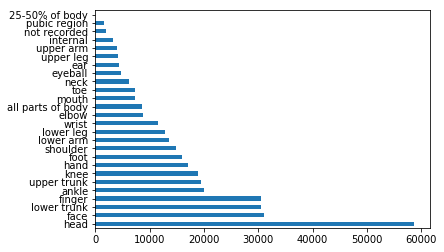

In [28]:
df.body_part.value_counts().plot(kind='barh')

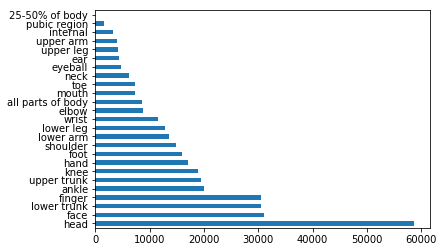

In [34]:
do_not_recorded = df[df.body_part != 'not recorded'].body_part.value_counts()
do_not_recorded.plot(kind='barh')

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [37]:
import numpy as np
np.nan

nan

In [38]:
df.body_part.replace("NaN", np.nan, inplace=True)

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

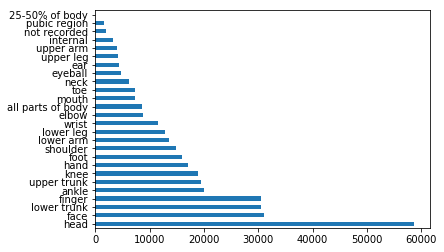

In [41]:
df.body_part.value_counts().plot(kind='barh')

## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [44]:
df.groupby('body_part')['age'].mean().sort_values()

body_part
pubic region         19.985874
ear                  24.248183
ankle                28.477512
wrist                30.697968
lower arm            32.357598
foot                 32.578666
knee                 34.106451
toe                  34.988766
hand                 35.811208
finger               35.978170
elbow                36.592934
eyeball              36.669599
neck                 38.354109
shoulder             39.266901
lower leg            44.255814
25-50% of body       44.333333
upper leg            45.934835
upper trunk          46.587663
upper arm            46.655129
face                 47.749193
lower trunk          49.667844
mouth                51.241957
head                 59.512637
internal             62.912978
all parts of body    63.406268
not recorded         79.576239
Name: age, dtype: float64

## Wait, "not recorded" seems really really really really old!

How can the average age be like 80???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [46]:
df.loc[df.age>=200, 'age'] = 1

# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

In [75]:
df_categories = pd.read_csv('categories-cleaned.txt', names=['prod1', 'item'], dtype={'prod1' : 'str', 'prod2' : 'str'})
print(df_categories.head())
df['prod1'].head()

  prod1                                     item
0  0102                 Wringer washing machines
1  0106  Electric clothes dryers without washers
2  0107       Gas clothes dryers without washers
3  0110                    Electric heating pads
4  0112           Sewing machines or accessories


0    1267
1    1439
2    3274
3     611
4    1893
Name: prod1, dtype: object

In [58]:
df.prod1.astype(str).str.pad(4, fillchar='0')

0         1267
1         1439
2         3274
3         0611
4         1893
5         1715
6         1138
7         5040
8         1807
9         4057
10        1894
11        1267
12        3274
13        1807
14        4057
15        0894
16        1817
17        0380
18        4014
19        0474
20        0676
21        5036
22        1239
23        1329
24        0611
25        0679
26        1884
27        3274
28        4076
29        1211
          ... 
357697    5017
357698    1616
357699    1426
357700    4076
357701    4014
357702    1233
357703    1807
357704    3262
357705    3286
357706    1871
357707    0676
357708    0464
357709    0836
357710    1205
357711    4076
357712    1807
357713    1936
357714    1842
357715    3216
357716    1913
357717    1616
357718    1522
357719    1616
357720    1807
357721    1301
357722    1864
357723    1931
357724    3250
357725    0464
357726    3273
Name: prod1, Length: 357727, dtype: object

In [63]:
df.prod1.str.pad(4, fillchar= '0')

0         1267
1         1439
2         3274
3         0611
4         1893
5         1715
6         1138
7         5040
8         1807
9         4057
10        1894
11        1267
12        3274
13        1807
14        4057
15        0894
16        1817
17        0380
18        4014
19        0474
20        0676
21        5036
22        1239
23        1329
24        0611
25        0679
26        1884
27        3274
28        4076
29        1211
          ... 
357697    5017
357698    1616
357699    1426
357700    4076
357701    4014
357702    1233
357703    1807
357704    3262
357705    3286
357706    1871
357707    0676
357708    0464
357709    0836
357710    1205
357711    4076
357712    1807
357713    1936
357714    1842
357715    3216
357716    1913
357717    1616
357718    1522
357719    1616
357720    1807
357721    1301
357722    1864
357723    1931
357724    3250
357725    0464
357726    3273
Name: prod1, Length: 357727, dtype: object

### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

In [70]:
categories = df.prod1.str.contains('music')

### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

## Out of those three, which is the most popular reason for admission?

## What parts of the body are injured by musical instruments most often?

# Adding categories

## Read in `categories-cleaned.txt`

## How many different categories are electric/electrical/electronic?

## Join this with your injuries dataframes to give every row a text product code

## How many different injuries involved an electric/electrical/electronic product?

## Graph the most common injuries involving an electrical product

## When people get injuries using an electrical product, what part of their body is injured?

## What product is most likely to injure your mouth?

## What product is most likely to injure your ears?